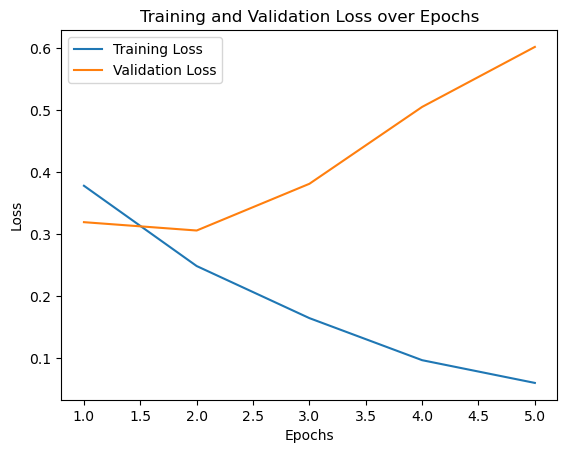

In [2]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4, 5]
training_loss = [0.377800, 0.248200, 0.164100, 0.096200, 0.059500]
validation_loss = [0.319022, 0.305550, 0.380989, 0.505090, 0.601944]

# Plot
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


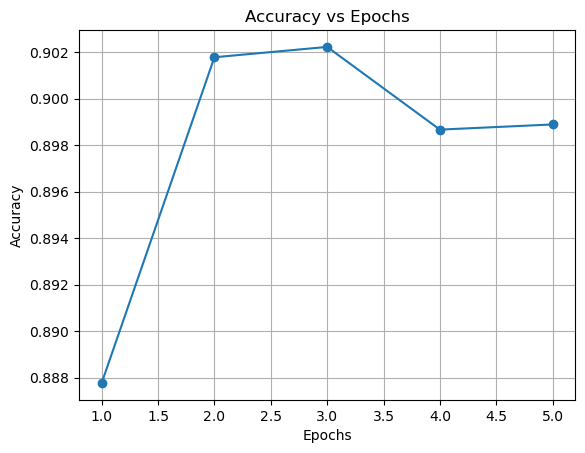

In [3]:
data = [
    (1, 0.288700, 0.263831, 0.887778),
    (2, 0.208900, 0.247506, 0.901778),
    (3, 0.134200, 0.308631, 0.902222),
    (4, 0.088700, 0.408591, 0.898667),
    (5, 0.053100, 0.491763, 0.898889)
]
epochs = [d[0] for d in data]
accuracy = [d[3] for d in data]
plt.plot(epochs, accuracy, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.grid(True)
plt.show()


In [1]:
import torch

# Load the PyTorch model
loaded_model = torch.load("pytorch_model.bin")


In [2]:
import pandas as pd

gme_reddit_comments_50k_random = pd.read_csv('datasets/50k_gme_reddit_comments_random.csv')
hist_prices = pd.read_csv('datasets/GME.csv')


In [ ]:
# renaming columns
new_column_names = {
    'Date': 'date',
    'Open': 'open_price',
    'High': 'high_price',
    'Low': 'low_price',
    'Close': 'close_price',
    'Adj Close': 'adjclose_price',
    'Volume': 'volume'
}

gme_df.rename(columns=new_column_names, inplace=True)


In [ ]:
gme_reddit_comments_50k_random['date'] = pd.to_datetime(gme_reddit_comments_50k_random['date'])
hist_prices['Date'] = pd.to_datetime(hist_prices['Date'])

# hist_prices['previous_close'] = hist_prices['Close'].hift(1)
#
hist_prices = hist_prices.sort_values('Date')
merged_df = pd.merge_asof(gme_reddit_comments_50k_random.sort_values('date'), hist_prices, left_on='date', right_on='Date', direction='backward')

merged_df.rename(columns={'Close': 'close_price'}, inplace=True)
merged_df.drop(columns=['Date'], inplace=True)


In [3]:
new_column_names = {
    'Date': 'date',
    'Open': 'open_price',
    'High': 'high_price',
    'Low': 'low_price',
    'Close': 'close_price',
    'Adj Close': 'adjclose_price',
    'Volume': 'volume'
}
merged_df.rename(columns=new_column_names, inplace=True)

merged_df.head()

,id,created_utc,body,sentiment,score,merged_body,date,sentiment_string,open_price,high_price,low_price,close_price,adjclose_price,volume
0,gwhk9ip,1619827707,Passive income is basically amoral in most cas...,0.0138,0,superstonk:0:Passive income is basically amora...,2021-05-01,positive,43.75,45.950001,43.174999,43.397499,43.397499,17734400
1,gwkae9a,1619890161,r/GME is great and all. We all like to come he...,0.9558,1,gme:1:r/GME is great and all. We all like to c...,2021-05-01,positive,43.75,45.950001,43.174999,43.397499,43.397499,17734400
2,gwkansc,1619890268,Honestly i'm just curious to see where this go...,0.5106,15,superstonk:15:Honestly i'm just curious to see...,2021-05-01,positive,43.75,45.950001,43.174999,43.397499,43.397499,17734400
3,gwkcfkg,1619891007,That price and current GME price is pretty clo...,0.6597,2,superstonk:2:That price and current GME price ...,2021-05-01,positive,43.75,45.950001,43.174999,43.397499,43.397499,17734400
4,gwkch1i,1619891024,I still think we need more growing in terms of...,-0.2918,4,amcstock:4:I still think we need more growing ...,2021-05-01,negative,43.75,45.950001,43.174999,43.397499,43.397499,17734400


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4.5) 

import numpy as np
import random

np.random.seed(42)
random.seed(42)


import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import train_test_split


In [53]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BertTokenizer

# Path to your saved model
model_path = 'models/finbert_fine_tuned_on_100k_datapoints'

tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-pretrain')

# Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Function to make predictions
def make_prediction(text):
    # Encode the text using the tokenizer
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=128)
    
    # Get predictions from model
    with torch.no_grad():
        outputs = model(**inputs)

    # Convert logits to probabilities (optional)
    # probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get the predicted class (optional)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    sentiment = "pos" if predicted_class == 1 else "neg"

    return sentiment

# Example usage
text = "body 50	And here's some more: * [LESSSGOOOOO](https://www.youtube.com/watch?v=aIVscxs9oJg) (this was 25 ec 2020) * [Selecting stocks based on FEEL](https://www.youtube.com/watch?v=PQBubLv49fk) (14Jul 2020) * Investment Style [part1](https://www.youtube.com/watch?v=1zi7XVudxME) &amp; [part2](https://www.youtube.com/watch?v=XUV0aiE4eSI) (14Jul 2020) * [Roaring Kitty's parts on the 17Feb 2021](https://www.youtube.com/watch?v=YkcYEBASafo) Gamestop Congressional Hearing * His first stream and his last video (so far) (published 17Apr 2021 after he **QUADRUPLED down** and showed ownership of 200.000 shares): [https://www.youtube.com/watch?v=qqOZ5mo7vOw](https://www.youtube.com/watch?v=qqOZ5mo7vOw) **GME Hype Trailer** ([YT link](https://www.youtube.com/watch?v=KQaIPa_8LsQ)) or [Crosspost version](https://www.reddit.com/r/Superstonk/comments/nmu45w/still_up_gme_hype_trailer_all_credit_to/)) *I like DFV, I like the stonk!*"
pred = make_prediction(text)
print("Predicted class:", pred)


Predicted class: pos
